In [21]:
from math import sqrt, ceil
from numpy import linspace,cos,pi,ceil,floor,arange
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import resample
import numpy as np

#from stack overflow
def is_prime(n):
    if n == 2:
        return True
    if n % 2 == 0 or n <= 1:
        return False

    sqr = int(sqrt(n)) + 1

    for d in range(3, sqr, 2):
        if n % d == 0:
            return False
        
    return True

def fft_(data, rfft_use = False):
    print("fft")
    N = len(data)
    y = data
    
    # efficiency check
    if is_prime(N):
        data.append(0)
    
    if rfft_use:
        Y_k_pos = np.abs(np.fft.rfft(y))/N
    else:
        # has real negative imagin -> squash to only quad 1
        Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT + norm
        Y_k[1:] = 2*Y_k[1:] # single-sided spectrum only
        Y_k_pos = np.abs(Y_k) # only real part
    
    return Y_k_pos

def fft_filter(data, threshold_pre = 99):
    dataf = np.copy(data)
    print("filter")
    threshold = np.percentile(dataf, threshold_pre)
    threshold_indices = dataf < threshold
    dataf[threshold_indices] = 0
    
    return dataf

def find_ny(fdata):
    print("ny")
    min_sample_rate = np.max(np.nonzero(fdata))*2+1
    print(min_sample_rate)
    return min_sample_rate

def resample_(data, duration, new_rate = -1):
    print("resamp")
    print(new_rate)
    #return []
    #print(new_rate, type(new_rate))
    return resample(data, int(new_rate*duration))

def ifft_(fdata):
    print("ifft")
    return np.fft.ifft(fdata)

def resample_summary(data, original_rate, new_rate = 0, threshold = 99):
    
    duration = len(data)/original_rate
    
    def channel_summary(c):
        print("channel")
        ret = {}
        ret["fdata"] = fft_(c)
        ret["ffdata"] = fft_filter(ret["fdata"], threshold)
        ret["ny_rate"] = find_ny(ret["ffdata"])
        ret["ifftdata"] = ifft_(ret["fdata"])
        
        if new_rate == 0:
            new_data = resample_(data, duration, ret["ny_rate"])
            ret["new_rate"] = ret["ny_rate"]
        else:
            new_data = resample_(data, duration, new_rate)
            ret["new_rate"] = new_rate
            
        ret["data"] = new_data
        return ret
        
        
    channels = []
    if type(data[0]) == list:
        x,y = map(list, zip(*data))
        channels = [x,y]
    else:
        channels = [data]
        
    resampled_channels = [] 
    for each in channels:
        resampled_channels.append(channel_summary(each))
    
    return resampled_channels

In [36]:
freq, sound = wavfile.read("cantina.wav")


aa = resample_summary(sound, freq)

if len(aa) == 1:
    data = aa[0]["data"]
else:
    a = np.asarray(aa[0]["data"])
    b = np.asarray(aa[1]["data"])
    data = np.stack((a,b), axis = 1)
    data = np.asarray(data)
    
data

channel
fft
filter
ny
14217
ifft
resamp
14217


array([ -76.42217626,   56.01929229,  -40.14960322, ...,   17.12074494,
       -233.66116701, -267.3948048 ])

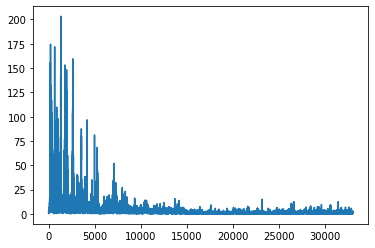

In [37]:
plt.plot(aa[0]["fdata"])

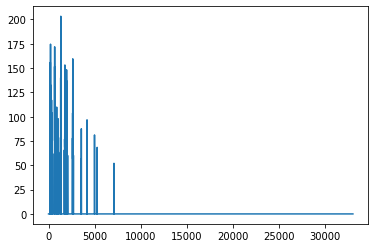

In [38]:
plt.plot(aa[0]["ffdata"])

/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


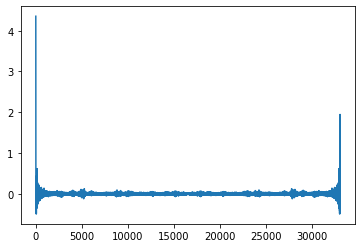

In [39]:
plt.plot(aa[0]["ifftdata"])

In [42]:
wavfile.write("c2.wav", aa[0]['new_rate'],data)

In [43]:
freq, sound = wavfile.read("2samp.wav")
aa = resample_summary(sound, freq)
if len(aa) == 1:
    data = aa[0]["data"]
else:
    a = np.asarray(aa[0]["data"])
    b = np.asarray(aa[1]["data"])
    data = np.stack((a,b), axis = 1)
    data = np.asarray(data)
    
data

channel
fft
filter
ny
459155
ifft
resamp
459155


array([[ 1.06869057e-12,  4.71481133e-13],
       [ 3.86614247e+01, -5.62490390e+00],
       [ 6.69095982e+01, -9.29419129e+00],
       ...,
       [-1.69734540e+02,  3.05745571e+01],
       [-1.05594515e+02,  1.79486876e+01],
       [-4.84688047e+01,  7.79924848e+00]])

In [ ]:
wavfile.write("22.wav", aa[0]['new_rate'],data)